# Лабораторная работа №1. Кластеризация

*Вариант 11*

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import silhouette_samples
from sklearn.metrics import accuracy_score
from matplotlib import cm 
from matplotlib import pyplot as plt
import seaborn as sns

palette = sns.color_palette("hls", 8)
sns.set_theme(palette=palette)

In [8]:
# импорт набора данных
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

X = df[['mean concave points', 'mean radius']]
Y = df[['target']]

X
data = load_breast_cancer()
Df = pd.DataFrame(data.data, columns=data.feature_names)
Df = Df[["mean concave points", "mean radius", "mean concavity"]]
Df.columns = ["concave points", "radius", "concavity"]
Df

,concave points,radius,concavity
0,0.14710,17.99,0.30010
1,0.07017,20.57,0.08690
2,0.12790,19.69,0.19740
3,0.10520,11.42,0.24140
4,0.10430,20.29,0.19800
...,...,...,...
564,0.13890,21.56,0.24390
565,0.09791,20.13,0.14400
566,0.05302,16.60,0.09251
567,0.15200,20.60,0.35140


Описание данных:
1. `mean concave points - средние вогнутые точки`
2. `mean radius - среднее значение расстояний от центра до точек по периметру`

In [11]:
scaler = StandardScaler()
df = scaler.fit_transform(Df)
df = pd.DataFrame(df, columns=Df.columns)
df_2 = df[["concave points", "radius"]]
df

,concave points,radius,concavity
0,2.532475,1.097064,2.652874
1,0.548144,1.829821,-0.023846
2,2.037231,1.579888,1.363478
3,1.451707,-0.768909,1.915897
4,1.428493,1.750297,1.371011
...,...,...,...
564,2.320965,2.110995,1.947285
565,1.263669,1.704854,0.693043
566,0.105777,0.702284,0.046588
567,2.658866,1.838341,3.296944


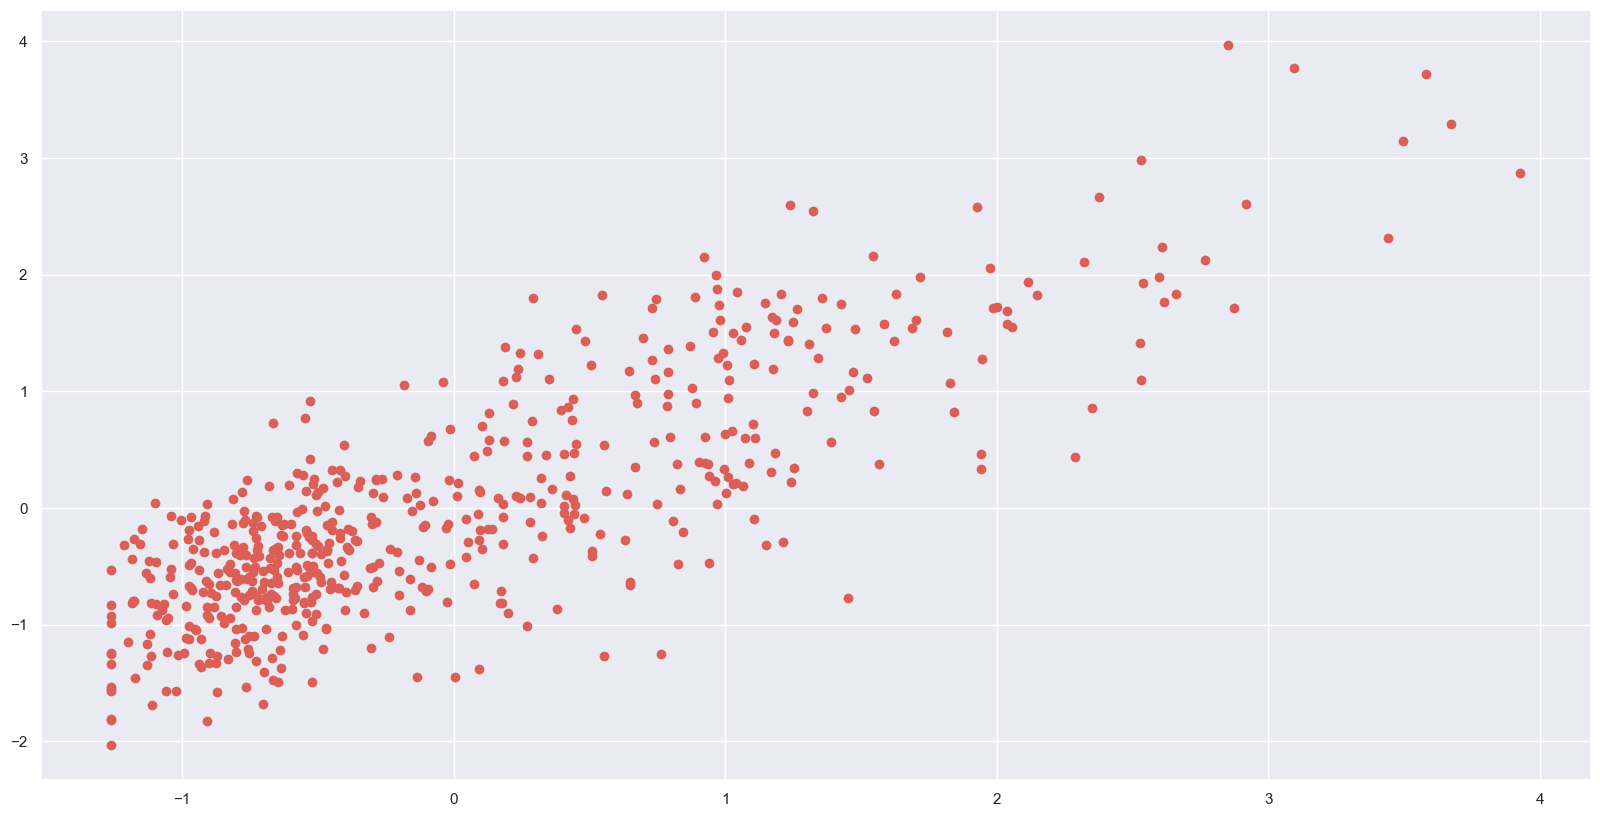

In [13]:
plt.figure(figsize=(20,10))
plt.scatter(df[['concave points']], df.radius)
plt.show()

По диаграмме рассеивания сложно предположить количество кластеров. Данные имеет скорее линейную зависимость. Однако, отчётливо видно скопление точек в нижнем левом углу. Предпологается наличие 3 кластеров (K1).

**Определение оптимального количества кластеров для метода локтя**

C:\Users\rocks\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


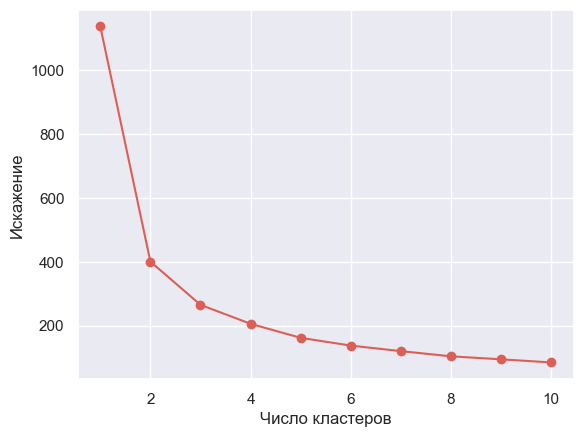

In [14]:
distortions = [] 
for i in range (1, 11): 
    km = KMeans(n_clusters=i, 
                init='random', 
                n_init=10 , 
                max_iter=300, 
                random_state=0) 
    km.fit(df_2)
    distortions.append(km.inertia_) 
plt.plot(range(1, 11) , distortions , marker='o') 
plt.xlabel('Чиcлo кластеров') 
plt.ylabel('Искажение') 
plt.show()

Как видно на графике выше, локоть расположен в k равным 2, что свидетельствует о том, что это значение является хорошим выбором для этого набора данных. Изначально предпологалось большее количество кластеров, поэтому оценка качества кластеризации проведём по обоим вариантам кол-ва кластеров.

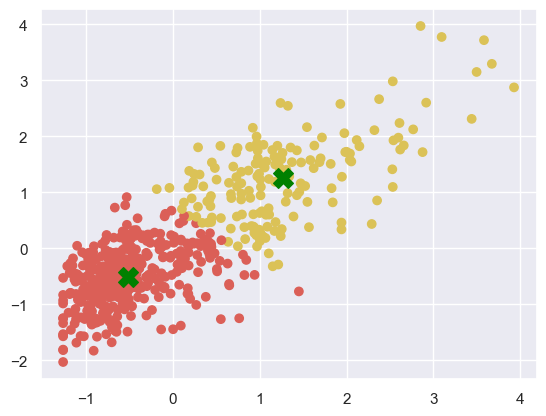

In [20]:
kmeans = KMeans(n_clusters=2,random_state=0).fit(df_2.values)
colors = [palette[i] for i in kmeans.labels_]
plt.scatter(df[['concave points']], df.radius, c=colors)
plt.scatter(kmeans.cluster_centers_ [:, 0], kmeans.cluster_centers_ [:, 1], 
           s=200, marker= 'X', c = 'green', label = 'центроиды')
plt.show()

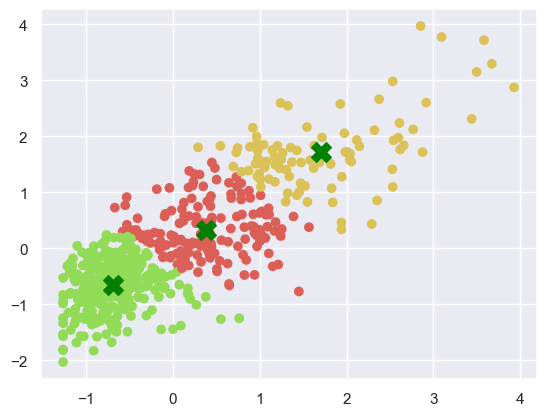

In [21]:
kmeans = KMeans(n_clusters=3,random_state=0).fit(df_2.values)
colors = [palette[i] for i in kmeans.labels_]
plt.scatter(df[['concave points']], df.radius, c=colors)
plt.scatter(kmeans.cluster_centers_ [:, 0], kmeans.cluster_centers_ [:, 1], 
           s=200, marker= 'X', c = 'green', label = 'центроиды')
plt.show()

Теперь видим, что каждая группа точек покрашена в цвет соответствующего кластера, зелёным помечены центры кластреров (центроиды). Попробуем оценить качество кластеризации в обоих вариантах.

**Количественная оценка качества кластеризации**

Средний коэффициент силуэта --  0.47275221126140693


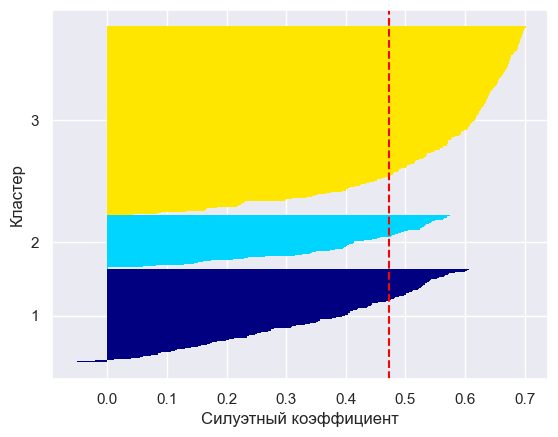

In [23]:
kmeans = KMeans(n_clusters=3,random_state=0).fit(df_2.values)
y_km = kmeans.fit_predict(df_2) 

cluster_labels = np.unique(y_km) 
n_clusters = cluster_labels.shape[0] 
silhouette_vals = silhouette_samples(df_2, y_km, metric='euclidean')

y_ax_lower , y_ax_upper = 0, 0 
yticks = [] 
for i, c in enumerate(cluster_labels): 
    c_silhouette_vals = silhouette_vals[y_km == c] 
    c_silhouette_vals.sort() 
    y_ax_upper += len(c_silhouette_vals) 
    color = cm.jet(float(i) / n_clusters) 
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_vals , 
             height=1.0, 
             edgecolor='none', 
             color=color) 
    yticks.append((y_ax_lower + y_ax_upper) / 2) 
    y_ax_lower += len(c_silhouette_vals) 
silhouette_avg = np.mean(silhouette_vals) 
    
plt.axvline(silhouette_avg, color= "red", linestyle="--" ) 
print ("Средний коэффициент силуэта -- ", silhouette_avg)
plt.yticks(yticks, cluster_labels + 1) 
plt.ylabel ('Кластер') 
plt.xlabel('Силуэтный коэффициент') 
plt.show() 

Средний коэффициент силуэта --  0.592701999305466


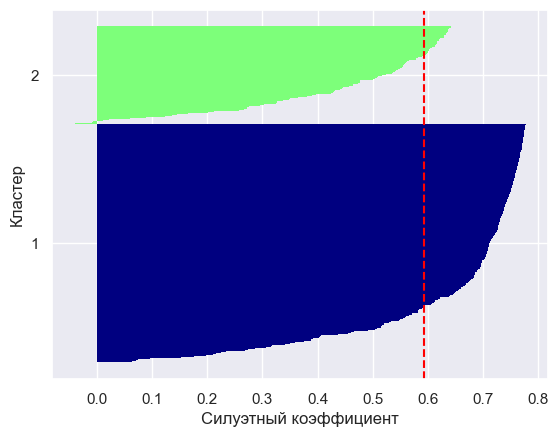

In [24]:
kmeans = KMeans(n_clusters=2,random_state=0).fit(df_2.values)
y_km = kmeans.fit_predict(df_2) 

cluster_labels = np.unique(y_km) 
n_clusters = cluster_labels.shape[0] 
silhouette_vals = silhouette_samples(df_2, y_km, metric='euclidean')

y_ax_lower , y_ax_upper = 0, 0 
yticks = [] 
for i, c in enumerate(cluster_labels): 
    c_silhouette_vals = silhouette_vals[y_km == c] 
    c_silhouette_vals.sort() 
    y_ax_upper += len(c_silhouette_vals) 
    color = cm.jet(float(i) / n_clusters) 
    plt.barh(range(y_ax_lower, y_ax_upper), 
             c_silhouette_vals , 
             height=1.0, 
             edgecolor='none', 
             color=color) 
    yticks.append((y_ax_lower + y_ax_upper) / 2) 
    y_ax_lower += len(c_silhouette_vals) 
silhouette_avg = np.mean(silhouette_vals) 
    
plt.axvline(silhouette_avg, color= "red", linestyle="--" ) 
print ("Средний коэффициент силуэта -- ", silhouette_avg)
plt.yticks(yticks, cluster_labels + 1) 
plt.ylabel ('Кластер') 
plt.xlabel('Силуэтный коэффициент') 
plt.show() 

Среднее значение силуэтного коэффициента выше во втором случае, когда количество кластеров равняется 2. Это является в порядке вещей, ведь раковые клетки, прогнозируемая переменная в выборке данных, могут быть только доброкачественные и злокачественные

**Сравнение результатов на обучающей и тестовой выборке**
Посмотрим, как прогнозировать принадлежность к кластерам, построенным по обучающим данным. Сравним значения средних силуэтных коэффициентов.

В обучающей выборке - 80% исходных наблюдений.  
Последующие действия будем выполнять с учётом третьего показателя

In [25]:
df_train = df.sample(frac=0.8)

# данные для прогнозов
df_predict = df.drop(df_train.index)

C:\Users\rocks\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


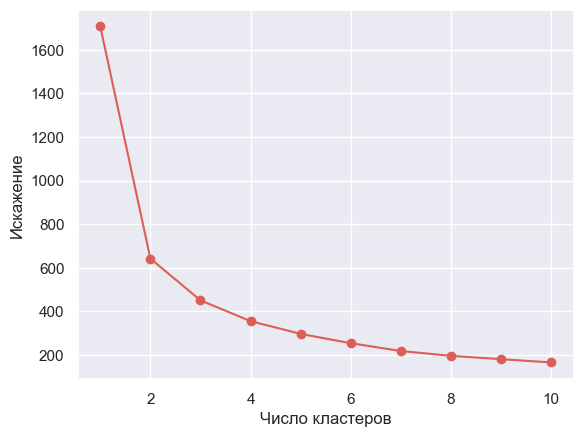

In [28]:
distortions = [] 
for i in range (1, 11): 
    km = KMeans(n_clusters=i, 
                init='random', 
                n_init=10 , 
                max_iter=300, 
                random_state=0) 
    km.fit(df)
    distortions.append(km.inertia_) 
plt.plot(range(1, 11) , distortions , marker='o') 
plt.xlabel('Чиcлo кластеров') 
plt.ylabel('Искажение') 
plt.show()

Видно изменение масштаба графика. По сравнению с 2 переменными  искажение показывает большие значения.   
При это перелом стал более выраженным на 2 кластерах

Обучаем алгоритм

In [29]:
kmeans = KMeans(n_clusters=2,random_state=0).fit(df_train.values)
y_km_train = kmeans.fit_predict(df_train) 
silhouette_vals = silhouette_samples(df_train, y_km_train, metric='euclidean')
silhouette_avg = np.mean(silhouette_vals) 
print ("Средний коэффициент силуэта -- ", silhouette_avg)

Средний коэффициент силуэта --  0.5836800337557986


Значение среднего силуэтного коэффициента ухудшилось, хоть и не намного.

In [30]:
y_km_predict = kmeans.fit_predict(df_predict) 
silhouette_vals = silhouette_samples(df_predict, y_km_predict, metric='euclidean')
silhouette_avg = np.mean(silhouette_vals) 
print ("Средний коэффициент силуэта -- ", silhouette_avg)

Средний коэффициент силуэта --  0.5624680009660254


На прогнозной выборки значение коэффициента ещё уменьшилось, хотя опять же не критично.

**Статистический анализ получившихся кластеров**

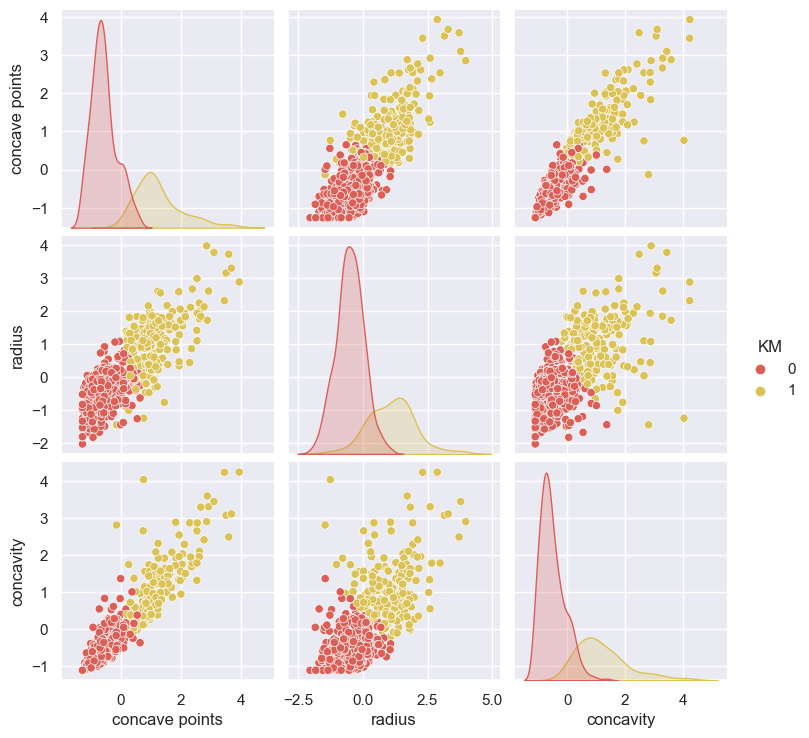

In [31]:
kmeans = KMeans(n_clusters=2,random_state=0).fit(df.values)
df["KM"] = kmeans.fit_predict(df) 
sns.pairplot(df, hue='KM')
plt.show()

Между признаками скорее прослеживаются линейные зависимости, хотя в этом случае стоит ожидать не очень удовлетворительных результатов. Рассеивание скорее всего будет слишком большое относительно прямой

**Оценка точности**

In [56]:
labels_true = data.target

kmeans = KMeans(n_clusters=2, random_state=0).fit(df_2)
labels_pred = kmeans.labels_

acc = accuracy_score(labels_true, labels_pred)

print(acc)

0.09666080843585237


Полученные значения крайне малы, однако это может быть связано с тем что при кластеризации номер кластера не связан с изначальной таргетной переменной, поэтому переобозначим номера кластеров

In [57]:
labels_pred = abs(labels_pred - 1)

acc = accuracy_score(labels_true, labels_pred)

print(acc)

0.9033391915641477


Таким образом, с точностью 90.3% два параметра concave points и radius корректно определяют принадлежность к доброкачественной или злокачественной группе